# Import data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
from torch.utils.data import Dataset, DataLoader

df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


No null values and all numbers are numeric so data seems pretty good already.

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Data all seems in valid ranges with appropriate min/max values.

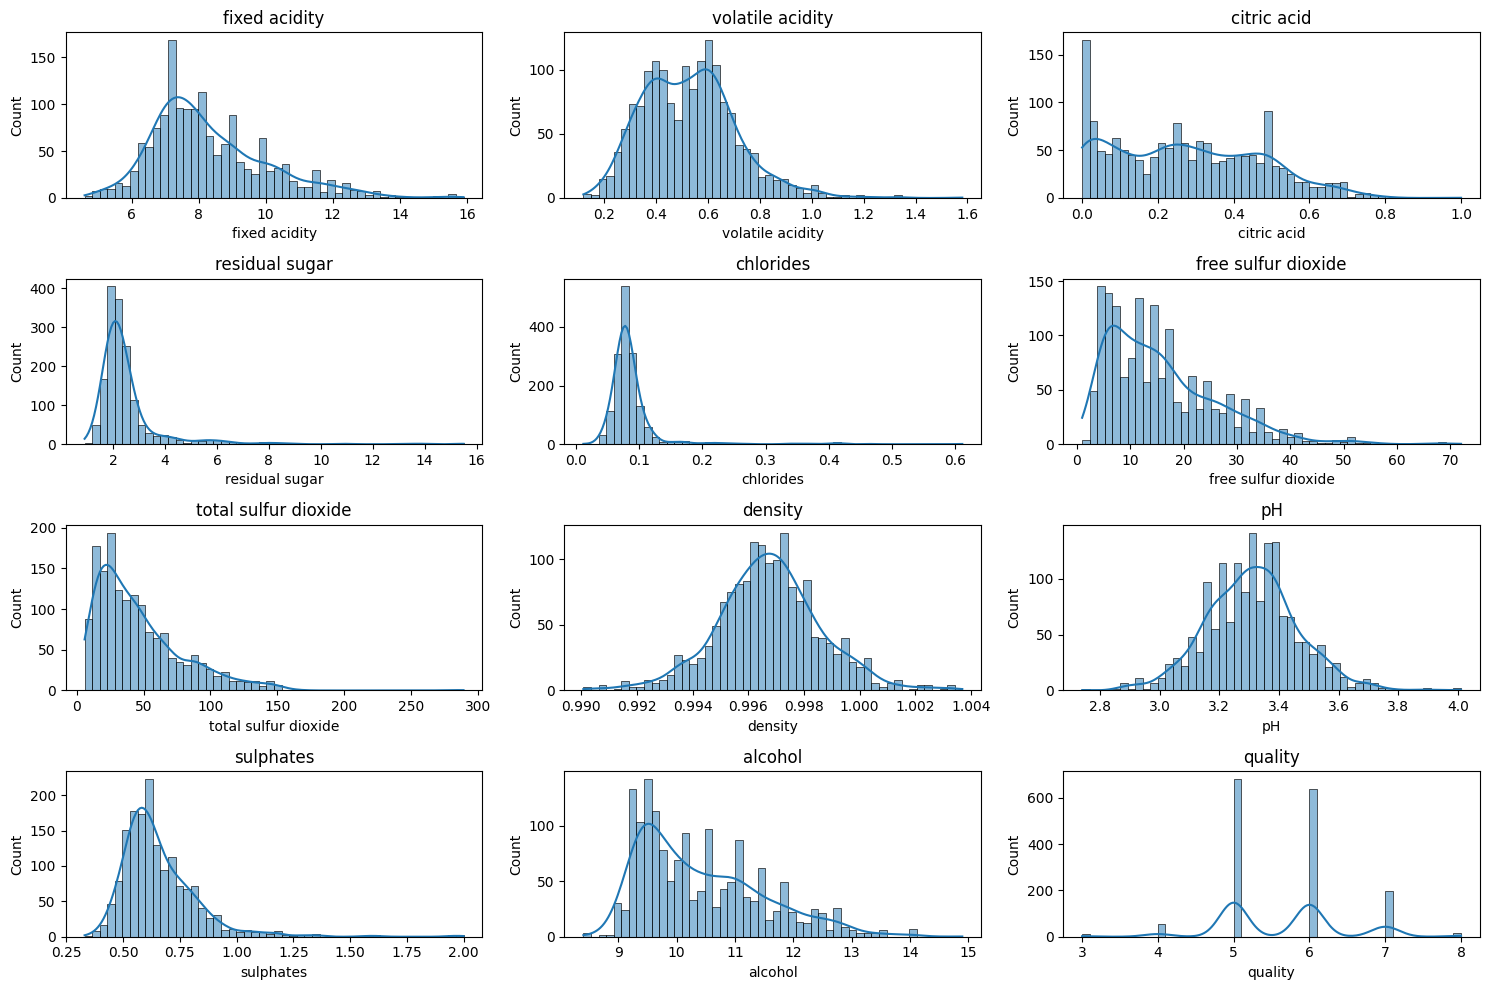

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15,10))
for column, ax in zip(df, axs.flatten()):
    ax.set_title(column)
    sns.histplot(df[column], kde=True, bins=50, ax=ax)
    
plt.tight_layout()
plt.show()

All columns seem somewhat regularly distributed - chlorides and residual sugar seem to maybe have outliers at high levels.

In [5]:
(df['chlorides'] > 0.2).sum()

41

In [6]:
(df['residual sugar'] > 6).sum()

48

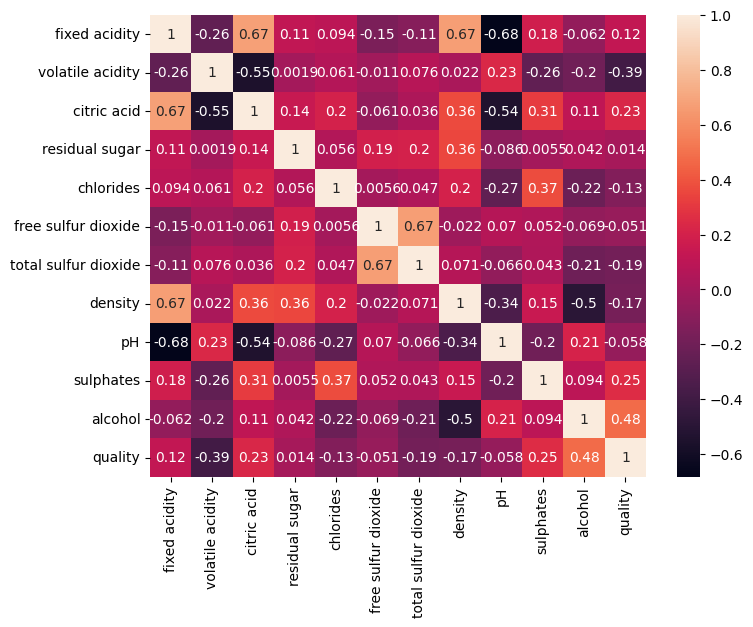

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

# Creating a basic MLP

In [8]:
# Prep data for MLP
X, y = df.iloc[:,:-1], df.iloc[:,-1]

In [9]:
train_x, ee_x, train_y, ee_y = train_test_split(X, y, test_size=0.3, random_state=42)
train_x.shape

(1119, 11)

In [10]:
valid_x, test_x, valid_y, test_y = train_test_split(ee_x, ee_y, test_size=0.5, random_state=42)
valid_x.shape

(240, 11)

In [11]:
b_train_x = torch.tensor(train_x.to_numpy(), dtype=torch.float32)
b_valid_x = torch.tensor(valid_x.to_numpy(), dtype=torch.float32)
b_test_x = torch.tensor(test_x.to_numpy(), dtype=torch.float32)
b_train_x

tensor([[ 8.6000,  0.2200,  0.3600,  ...,  3.4700,  0.8700, 11.0000],
        [12.5000,  0.4600,  0.6300,  ...,  2.9900,  0.8700, 10.2000],
        [ 7.2000,  0.5400,  0.2700,  ...,  3.3900,  0.7100, 11.0000],
        ...,
        [ 7.2000,  0.6200,  0.0600,  ...,  3.5100,  0.5400,  9.5000],
        [ 7.9000,  0.2000,  0.3500,  ...,  3.3200,  0.8000, 11.9000],
        [ 5.8000,  0.2900,  0.2600,  ...,  3.3900,  0.5400, 13.5000]])

In [12]:
train_y, test_y, valid_y = map(torch.tensor, (train_y.to_numpy(), test_y.to_numpy(), valid_y.to_numpy()))
train_y

tensor([7, 5, 5,  ..., 5, 7, 6])

In [13]:
class WineDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return len(self.x)

In [14]:
b_train_data = WineDataset(b_train_x, train_y)
b_valid_data = WineDataset(b_valid_x, valid_y)
b_test_data = WineDataset(b_test_x, test_y)

b_train_loader = DataLoader(b_train_data, batch_size=8)

In [15]:
class WineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs):
        super(WineMLP, self).__init__()
        self.input = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.linear1 = torch.nn.Linear(self.input, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.outputs)
        
        self.relu = torch.nn.ReLU()

    def forward(self, X):
        out = self.linear1(X)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [16]:
b_model = WineMLP(n_inputs=b_train_x.shape[1], hidden_size=5, n_outputs=1)
b_model

WineMLP(
  (linear1): Linear(in_features=11, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [17]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(params=b_model.parameters(), lr=0.0001)

In [18]:
def train(epochs, model, train_loader, valid_x, optimizer, criterion, num_print):
    loss_valid = []
    loss_train = []
    
    for epoch in range(epochs):
        model.train()
        epoch_loss_train = []
        
        for features, targets in train_loader:
            output = model.forward(features)
            loss = criterion(output, targets.float())
            epoch_loss_train.append(loss.item())
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        loss_train.append(sum(epoch_loss_train) / len(epoch_loss_train))
        
        model.eval()
        valid_hyp = model.forward(valid_x)
        loss_valid.append(criterion(valid_hyp, valid_y).item())
        
        if epoch % num_print == 0 or epoch >= epochs - 10:
            print('Epoch', epoch, 'Train loss:', loss_train[-1], 'Valid loss:', loss_valid[-1])

    return loss_train, loss_valid

In [19]:
epochs = 100
loss_train, loss_valid = train(epochs, b_model, b_train_loader, b_valid_x, optimizer, criterion, 10)

C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([240])) that is different to the input size (torch.Size([240, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduc

Epoch 0 Train loss: 10.586434674263 Valid loss: 7.349574565887451
Epoch 10 Train loss: 1.06692340948752 Valid loss: 1.0126124620437622
Epoch 20 Train loss: 0.9359556055494718 Valid loss: 0.8793531060218811
Epoch 30 Train loss: 0.8645422865237509 Valid loss: 0.8094875812530518
Epoch 40 Train loss: 0.8208245990531785 Valid loss: 0.7702544331550598
Epoch 50 Train loss: 0.7932838437812669 Valid loss: 0.7470826506614685
Epoch 60 Train loss: 0.7748577382947718 Valid loss: 0.7332779765129089
Epoch 70 Train loss: 0.7630121505686215 Valid loss: 0.7245903611183167
Epoch 80 Train loss: 0.7556201070547104 Valid loss: 0.7188588380813599
Epoch 90 Train loss: 0.7498075579958302 Valid loss: 0.7157362103462219
Epoch 91 Train loss: 0.7498845889100006 Valid loss: 0.7152621746063232
Epoch 92 Train loss: 0.7493899475250926 Valid loss: 0.7149354815483093
Epoch 93 Train loss: 0.7489624347005571 Valid loss: 0.7146514058113098
Epoch 94 Train loss: 0.7485525251499244 Valid loss: 0.7143855094909668
Epoch 95 Trai

In [20]:
def plot_loss(epochs, loss_train, loss_valid):
    plt.plot(range(epochs), loss_train, label='Training Loss')
    plt.plot(range(epochs), loss_valid, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

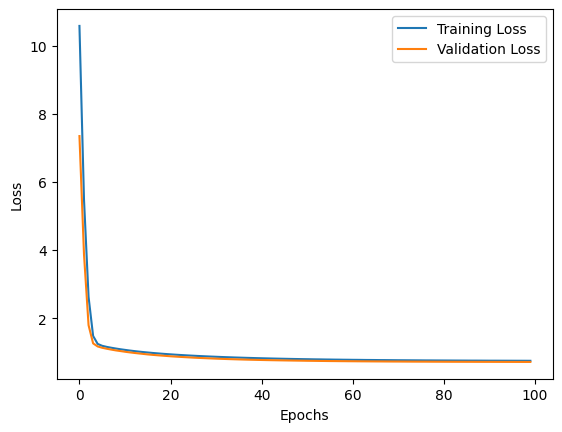

In [21]:
plot_loss(epochs, loss_train, loss_valid)

In [22]:
test_hyp = b_model.forward(b_test_x)
print('Basic MLP MSE:', criterion(test_hyp, test_y.float()).item())

Basic MLP MSE: 0.80551677942276


# Making changes to basic MLP

In [23]:
# Normalize the data
scaler = StandardScaler()
scaler.fit(train_x)
n_train_x = scaler.transform(train_x)
n_valid_x = scaler.transform(valid_x)
n_test_x = scaler.transform(test_x)
n_train_x

array([[ 1.69536131e-01, -1.72107140e+00,  4.59303345e-01, ...,
         1.01180685e+00,  1.22661179e+00,  5.50057013e-01],
       [ 2.44606730e+00, -4.01957443e-01,  1.84105501e+00, ...,
        -2.10687612e+00,  1.22661179e+00, -2.05174641e-01],
       [-6.47680186e-01,  3.77472102e-02, -1.28054303e-03, ...,
         4.92026353e-01,  2.97270776e-01,  5.50057013e-01],
       ...,
       [-6.47680186e-01,  4.77451864e-01, -1.07597628e+00, ...,
         1.27169710e+00, -6.90154049e-01, -8.66002338e-01],
       [-2.39072027e-01, -1.83099757e+00,  4.08127357e-01, ...,
         3.72184202e-02,  8.20025095e-01,  1.39969262e+00],
       [-1.46489650e+00, -1.33632983e+00, -5.24565306e-02, ...,
         4.92026353e-01, -6.90154049e-01,  2.91015593e+00]])

In [24]:
n_train_x = torch.tensor(n_train_x, dtype=torch.float32)
n_valid_x = torch.tensor(n_valid_x, dtype=torch.float32)
n_test_x = torch.tensor(n_test_x, dtype=torch.float32)
n_train_x

tensor([[ 1.6954e-01, -1.7211e+00,  4.5930e-01,  ...,  1.0118e+00,
          1.2266e+00,  5.5006e-01],
        [ 2.4461e+00, -4.0196e-01,  1.8411e+00,  ..., -2.1069e+00,
          1.2266e+00, -2.0517e-01],
        [-6.4768e-01,  3.7747e-02, -1.2805e-03,  ...,  4.9203e-01,
          2.9727e-01,  5.5006e-01],
        ...,
        [-6.4768e-01,  4.7745e-01, -1.0760e+00,  ...,  1.2717e+00,
         -6.9015e-01, -8.6600e-01],
        [-2.3907e-01, -1.8310e+00,  4.0813e-01,  ...,  3.7218e-02,
          8.2003e-01,  1.3997e+00],
        [-1.4649e+00, -1.3363e+00, -5.2457e-02,  ...,  4.9203e-01,
         -6.9015e-01,  2.9102e+00]])

In [25]:
n_train_data = WineDataset(n_train_x, train_y)
n_valid_data = WineDataset(n_valid_x, valid_y)
n_test_data = WineDataset(n_test_x, test_y)

n_train_loader = DataLoader(n_train_data, batch_size=8)

In [26]:
class ImprovedWineMLP(torch.nn.Module):
    def __init__(self, n_inputs, hidden_size, n_outputs, dropout=0):
        super(ImprovedWineMLP, self).__init__()
        self.input = n_inputs
        self.hidden = hidden_size
        self.outputs = n_outputs

        self.linear1 = torch.nn.Linear(self.input, self.hidden)
        self.linear2 = torch.nn.Linear(self.hidden, self.hidden)
        self.linear3 = torch.nn.Linear(self.hidden, self.outputs)
        self.dropout = torch.nn.Dropout(dropout)
        self.activation = torch.nn.ReLU()

    def forward(self, X):
        out = self.linear1(X)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.linear2(out)
        out = self.activation(out)
        out = self.dropout(out)
        out = self.linear3(out)
        return out

First we can try an increase in the number of hidden layers to two as well as increasing the number of units and epochs for the model.

In [27]:
model = ImprovedWineMLP(n_inputs=n_train_x.shape[1], hidden_size=10, n_outputs=1)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)
epochs = 1000
loss_train, loss_valid = train(epochs=epochs, model=model, train_loader=n_train_loader, valid_x=n_valid_x, optimizer=optimizer, criterion=criterion, num_print=100)

Epoch

C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([7])) that is different to the input size (torch.Size([7, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
C:\Python312\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([240])) that is different to the input size (torch.Size([240, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduc

 0 Train loss: 27.89681042262486 Valid loss: 27.310121536254883
Epoch 100 Train loss: 0.7441033088735172 Valid loss: 0.6829286217689514
Epoch 200 Train loss: 0.6939853192440101 Valid loss: 0.6415441632270813
Epoch 300 Train loss: 0.6756609944360596 Valid loss: 0.6250880360603333
Epoch 400 Train loss: 0.6676923927451883 Valid loss: 0.6176790595054626
Epoch 500 Train loss: 0.6632909630026136 Valid loss: 0.6136980652809143
Epoch 600 Train loss: 0.6604946458978312 Valid loss: 0.6113724708557129
Epoch 700 Train loss: 0.6587888373860291 Valid loss: 0.6098321080207825
Epoch 800 Train loss: 0.6575296754283565 Valid loss: 0.6086556911468506
Epoch 900 Train loss: 0.6566445213343416 Valid loss: 0.6077799201011658
Epoch 990 Train loss: 0.6560682012566499 Valid loss: 0.6071640253067017
Epoch 991 Train loss: 0.6560631075075695 Valid loss: 0.6071625351905823
Epoch 992 Train loss: 0.6560573493795735 Valid loss: 0.6071596741676331
Epoch 993 Train loss: 0.6560513959399291 Valid loss: 0.6071462631225586


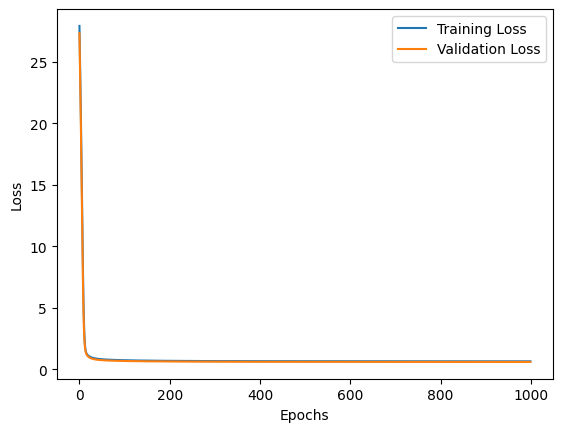

In [28]:
plot_loss(epochs, loss_train, loss_valid)

This is already a good improvement, but we can continue to tweak some hyperparameters to see if we can do better. Because the training and validation error are pretty close and the model is not overly complex I don't think it's overfitting but we can add some dropout to see if that makes a difference.

In [29]:
model = ImprovedWineMLP(n_inputs=n_train_x.shape[1], hidden_size=10, n_outputs=1, dropout=0.3)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)
loss_train, loss_valid = train(epochs=1000, model=model, train_loader=n_train_loader, valid_x=n_valid_x, optimizer=optimizer, criterion=criterion, num_print=100)

Epoch 0 Train loss: 31.77423746926444 Valid loss: 30.57718276977539
Epoch 100 Train loss: 1.6505465941769737 Valid loss: 0.7149820327758789
Epoch 200 Train loss: 1.222757695189544 Valid loss: 0.6514005661010742
Epoch 300 Train loss: 1.0728273470486913 Valid loss: 0.6338618397712708
Epoch 400 Train loss: 0.9366371133497783 Valid loss: 0.6246988773345947
Epoch 500 Train loss: 0.8401742290173259 Valid loss: 0.6160906553268433
Epoch 600 Train loss: 0.8146218474422182 Valid loss: 0.6127973198890686
Epoch 700 Train loss: 0.7741620481014252 Valid loss: 0.609506368637085
Epoch 800 Train loss: 0.7426248483359814 Valid loss: 0.6085004210472107
Epoch 900 Train loss: 0.7320085294544697 Valid loss: 0.6067656874656677
Epoch 990 Train loss: 0.7139235741325787 Valid loss: 0.6050871014595032
Epoch 991 Train loss: 0.7175169214606285 Valid loss: 0.605117917060852
Epoch 992 Train loss: 0.7173603455935206 Valid loss: 0.6050469875335693
Epoch 993 Train loss: 0.7146548024245671 Valid loss: 0.6050242781639099

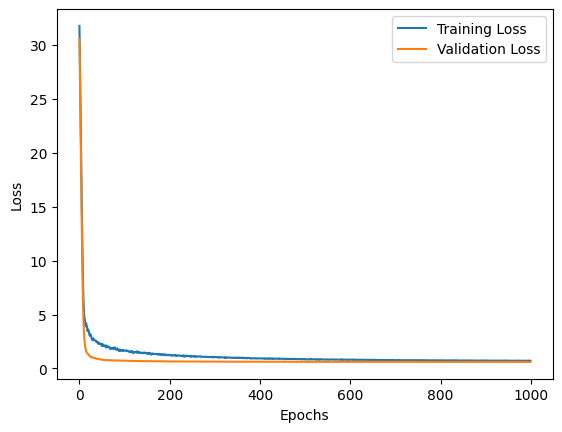

In [30]:
plot_loss(epochs, loss_train, loss_valid)

Adding this dropout reduced our validation error *very* slightly so we could keep it. Because we do not have very many features in this dataset we could now try reducing the number of nodes in each hidden layer.

In [31]:
model = ImprovedWineMLP(n_inputs=n_train_x.shape[1], hidden_size=7, n_outputs=1, dropout=0.3)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)
loss_train, loss_valid = train(epochs=1000, model=model, train_loader=n_train_loader, valid_x=n_valid_x, optimizer=optimizer, criterion=criterion, num_print=100)

Epoch 0 Train loss: 34.924978842054095 Valid loss: 34.13016891479492
Epoch 100 Train loss: 1.5968991109303066 Valid loss: 0.7388812899589539
Epoch 200 Train loss: 1.2246336370706559 Valid loss: 0.6582406163215637
Epoch 300 Train loss: 1.016764633996146 Valid loss: 0.6343779563903809
Epoch 400 Train loss: 0.9032658523746899 Valid loss: 0.6215518712997437
Epoch 500 Train loss: 0.8366991979735238 Valid loss: 0.6132311224937439
Epoch 600 Train loss: 0.78508479063 Valid loss: 0.6115708947181702
Epoch 700 Train loss: 0.7515482427818435 Valid loss: 0.6074503660202026
Epoch 800 Train loss: 0.7303684113281114 Valid loss: 0.6066745519638062
Epoch 900 Train loss: 0.70855838400977 Valid loss: 0.6043869256973267
Epoch 990 Train loss: 0.6978667965957097 Valid loss: 0.6035863757133484
Epoch 991 Train loss: 0.6978332292820726 Valid loss: 0.6036031246185303
Epoch 992 Train loss: 0.6991283708385059 Valid loss: 0.6034138202667236
Epoch 993 Train loss: 0.6950432166457177 Valid loss: 0.603338360786438
Epoc

Again this was a slight increase in performance. What about modifying the number of epochs and learning rate?

In [32]:
model = ImprovedWineMLP(n_inputs=n_train_x.shape[1], hidden_size=7, n_outputs=1, dropout=0.3)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.0001)
loss_train, loss_valid = train(epochs=500, model=model, train_loader=n_train_loader, valid_x=n_valid_x, optimizer=optimizer, criterion=criterion, num_print=100)

Epoch 0 Train loss: 32.960194315229145 Valid loss: 32.4982795715332
Epoch 100 Train loss: 1.647436486184597 Valid loss: 0.7714731693267822
Epoch 200 Train loss: 1.219993166412626 Valid loss: 0.6785417795181274
Epoch 300 Train loss: 0.9634055461202349 Valid loss: 0.6406536102294922
Epoch 400 Train loss: 0.8328468122652599 Valid loss: 0.6241713166236877
Epoch 490 Train loss: 0.793997511267662 Valid loss: 0.6160114407539368
Epoch 491 Train loss: 0.7832646855286189 Valid loss: 0.6160386800765991
Epoch 492 Train loss: 0.7722520872950553 Valid loss: 0.6162340044975281
Epoch 493 Train loss: 0.7662952052695411 Valid loss: 0.61618572473526
Epoch 494 Train loss: 0.7765394728098597 Valid loss: 0.6158270835876465
Epoch 495 Train loss: 0.7805330350995063 Valid loss: 0.6156293153762817
Epoch 496 Train loss: 0.7904335662722588 Valid loss: 0.6158027052879333
Epoch 497 Train loss: 0.7854880247797285 Valid loss: 0.6155068874359131
Epoch 498 Train loss: 0.779902426472732 Valid loss: 0.6152735948562622
Ep

In [33]:
model = ImprovedWineMLP(n_inputs=n_train_x.shape[1], hidden_size=7, n_outputs=1, dropout=0.3)
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
loss_train, loss_valid = train(epochs=1000, model=model, train_loader=n_train_loader, valid_x=n_valid_x, optimizer=optimizer, criterion=criterion, num_print=100)

Epoch 0 Train loss: 21.326463638033186 Valid loss: 14.9625825881958
Epoch 100 Train loss: 0.6727545471063682 Valid loss: 0.6005528569221497
Epoch 200 Train loss: 0.6596869568739618 Valid loss: 0.5987685918807983
Epoch 300 Train loss: 0.6588226713240146 Valid loss: 0.5983585119247437
Epoch 400 Train loss: 0.6586186190801008 Valid loss: 0.5983389019966125
Epoch 500 Train loss: 0.6575395024248532 Valid loss: 0.5983786582946777
Epoch 600 Train loss: 0.6575452056314264 Valid loss: 0.5985643267631531
Epoch 700 Train loss: 0.6577289604714939 Valid loss: 0.5985531806945801
Epoch 800 Train loss: 0.6571758262813091 Valid loss: 0.5988114476203918
Epoch 900 Train loss: 0.657558582510267 Valid loss: 0.5987783670425415
Epoch 990 Train loss: 0.6581582149224622 Valid loss: 0.599023699760437
Epoch 991 Train loss: 0.6569142886570521 Valid loss: 0.5989572405815125
Epoch 992 Train loss: 0.6568235495260784 Valid loss: 0.5989671349525452
Epoch 993 Train loss: 0.6570707559585571 Valid loss: 0.598990797996521

Increasing the learning rate by 10x led to the lowest validation loss so I will now see how this performs on the test data.

In [34]:
def evaluate_model(model, test_x):
    test_hyp = model.forward(test_x)
    return criterion(test_hyp, test_y.float()).item()

base_model_perf = evaluate_model(b_model, b_test_x)
new_model_perf = evaluate_model(model, n_test_x)
improvement_percentage = (base_model_perf - new_model_perf) / base_model_perf * 100
print(f'Basic Model MSE: {base_model_perf}')
print(f'New model MSE: {new_model_perf}')
print(f'Improvement from basic MLP: {improvement_percentage}%')

Basic Model MSE: 0.80551677942276
New model MSE: 0.6750238537788391
Improvement from basic MLP: 16.199901600738002%


Increasing the number of hidden layers from one to two, increasing the number of nodes in the hidden layers from 5 to 7, adding 0.3 dropout, and increasing the number of epochs and learning rate led to about a 16% improvement in the performance of our model.